170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 159s 1us/step


C:\Users\Mothilal Chowdary\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3113 - loss: 1.8364 - val_accuracy: 0.5494 - val_loss: 1.2450
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.5412 - loss: 1.2817 - val_accuracy: 0.6315 - val_loss: 1.0401
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6168 - loss: 1.0837 - val_accuracy: 0.6492 - val_loss: 1.0053
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.6634 - loss: 0.9640 - val_accuracy: 0.7011 - val_loss: 0.8574
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6935 - loss: 0.8792 - val_accuracy: 0.7161 - val_loss: 0.8128
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.7143 - loss: 0.8181 - val_accuracy: 0.7209 - val_loss: 0.8138
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7321 - loss: 0.7626 - val_accuracy: 0.7390 - val_loss: 0.7626
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7539 - loss: 0.7058 - 

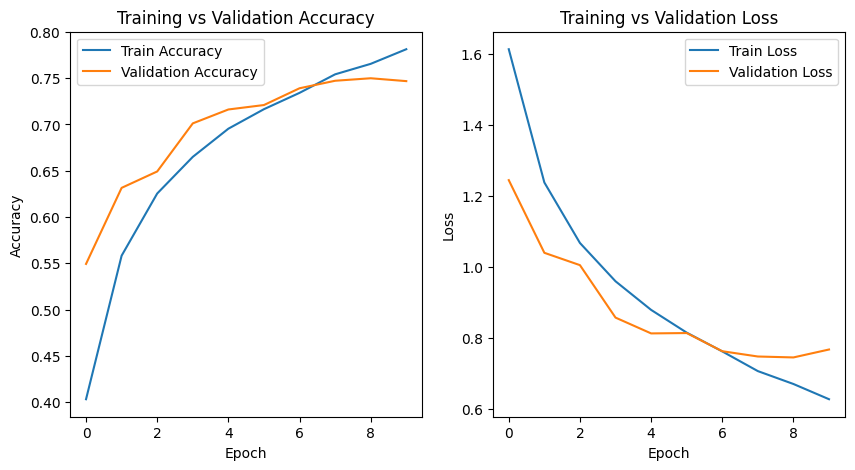

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78      1000
           1       0.88      0.85      0.87      1000
           2       0.73      0.57      0.64      1000
           3       0.59      0.50      0.54      1000
           4       0.63      0.79      0.70      1000
           5       0.65      0.68      0.66      1000
           6       0.75      0.86      0.80      1000
           7       0.74      0.82      0.78      1000
           8       0.87      0.83      0.85      1000
           9       0.84      0.83      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize images (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(10,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

# Generate classification report
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:\n", classification_report(y_test.flatten(), y_pred_classes))
